<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Sequential Learning: Stochastic bandits
</p><br> 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

from ftl import FTL
from ucb import UCB
from ucb_v import UCB_V
from kl_ucb import KL_UCB

In [3]:
def compute_regret(algo_cls, T, K, list_p, nb_runs, **kwargs):
    """
    Get the expected regret over a certain number of runs to be close to the expectation.
    Returns the list of regret per step instead of the total regret for plotting.
    
    kwargs: parameters specific to the algo_cls (assumes it contains the name of the algorithm)
    """
    regrets = np.zeros((nb_runs, T))
    for i in range(nb_runs):
        if kwargs['name'] in ['FTL', 'KL_UCB']:
            algo = algo_cls(T, K, list_p)
        elif kwargs['name'] == 'UCB':
            algo = algo_cls(T, K, list_p, kwargs['sigma'])
        elif kwargs['name'] == 'UCB_V':
            algo = algo_cls(T, K, list_p, kwargs['b'], kwargs['xi'], kwargs['c'])
        else:
            raise NotImplementedError
        algo.run()
        regrets[i, :] = algo.regret
    
    return regrets

# Follow The Leader

In [4]:
# Hyperparameters
K = 2
list_p = [0.5, 0.6]
T = 100
nb_runs = 1000
regrets_FTL = np.zeros((nb_runs, T))

# Create algorithm
regrets_FTL = compute_regret(FTL, T, K, list_p, nb_runs, name='FTL')

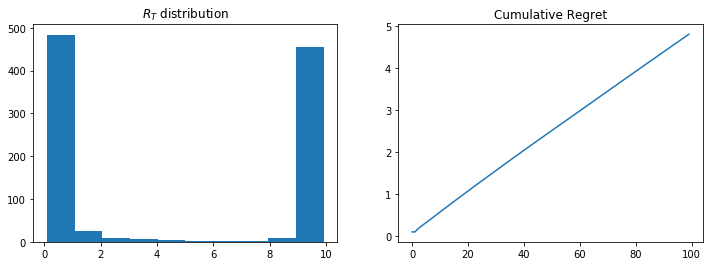

In [5]:
# Plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(regrets_FTL[:,T-1], bins=10)
plt.title('$R_T$ distribution')

plt.subplot(1, 2, 2)
plt.plot(regrets_FTL.mean(axis=0))
plt.title('Cumulative Regret')

plt.show()

## Analysis of UCB($\sigma^2$) on a 2-armed-bandits

In [6]:
# Hyperparameters
K = 2
list_p = [0.5, 0.6]
sigma = np.sqrt(1/4)
T = 1000
nb_runs = 1000
time_steps = np.arange(T)+1
regrets_UCB = compute_regret(UCB, T, K, list_p, nb_runs, name='UCB', sigma=sigma)

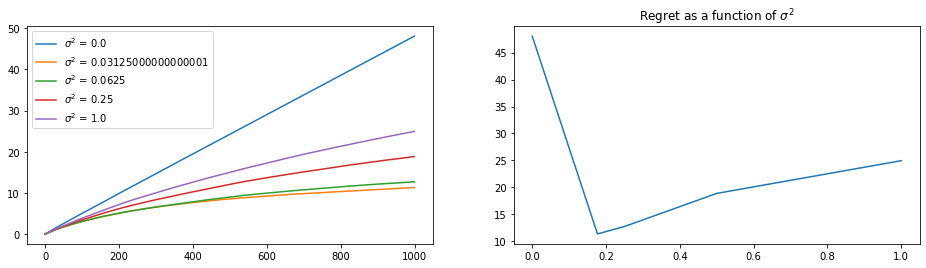

In [7]:
# For multiple sigma
sigma_list = np.sqrt([0, 1/32, 1/16, 1/4, 1])
list_p = [0.5, 0.6]
dict_regrets = {}

# Create algorithm
for sigma in sigma_list:
    dict_regrets[sigma] = compute_regret(UCB, T, K, list_p, nb_runs, name='UCB', sigma=np.sqrt(sigma))
    
# Plots
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
for i, sigma in enumerate(sigma_list):
    plt.plot(dict_regrets[sigma].mean(axis=0), label=f'$\sigma^2$ = {sigma**2}')
plt.legend()

values = [dict_regrets[sigma][:, -1].mean() for sigma in sigma_list]

plt.subplot(1, 2, 2)
plt.plot(sigma_list, values)
plt.title('Regret as a function of $\sigma^2$')

plt.show()

## Global comparison

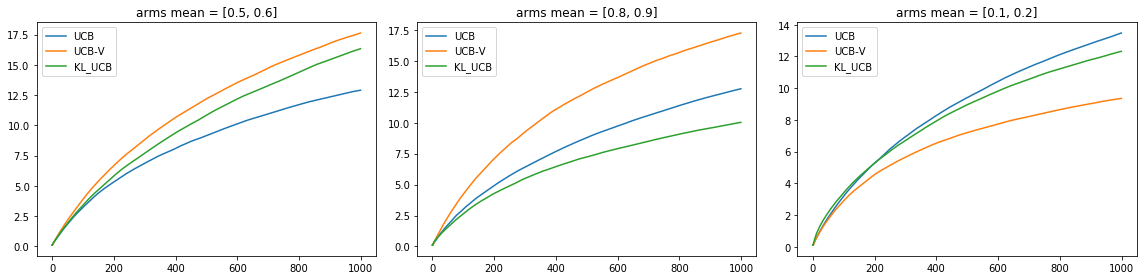

In [8]:
# For multiple sigma
K = 2
array_list_p = [[0.5, 0.6], [0.8, 0.9], [0.1, 0.2]]
b = 1
xi = 1.2 
c = 1
dict_regrets_ucb = {}
dict_regrets_ucbv = {}
dict_regrets_klucb = {}

# Create algorithm
for list_p in array_list_p:
    dict_regrets_ucb[str(list_p)] = compute_regret(UCB, T, K, list_p, nb_runs, name='UCB', sigma=1/2)
    dict_regrets_ucbv[str(list_p)] = compute_regret(UCB_V, T, K, list_p, nb_runs, name='UCB_V', b=b, xi=xi, c=c)
    dict_regrets_klucb[str(list_p)] = compute_regret(KL_UCB, T, K, list_p, nb_runs, name='KL_UCB')
    
# Plots
plt.figure(figsize=(16, 4))

for i, list_p in enumerate(array_list_p):
    plt.subplot(1, 3, i+1, title=f'arms mean = {list_p}')
    plt.plot(dict_regrets_ucb[str(list_p)].mean(axis=0), label='UCB')
    plt.plot(dict_regrets_ucbv[str(list_p)].mean(axis=0), label='UCB-V')
    plt.plot(dict_regrets_klucb[str(list_p)].mean(axis=0), label='KL_UCB')
    plt.legend()

plt.tight_layout()
plt.show()